# Analisis Data Terhadap Penjualan Online

**Online Dataset** : [Online Sales](https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data/data)

## Import Library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Membaca dataset
onlinesales_df = pd.read_csv("Online Sales Data.csv")
onlinesales_df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
# Mengecek informasi dataset
onlinesales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [6]:
# Mengecek apakah terdapat missing value
onlinesales_df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [7]:
# Mengecek apakah terdapat data duplikat
print("Jumlah duplikasi: ", onlinesales_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# Mengecek statistik data numerik
onlinesales_df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [9]:
# Mengganti spasi pada kolom dengan (_)
onlinesales_df.columns = onlinesales_df.columns.str.replace(' ', '_')

onlinesales_df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [10]:
# Memecah kolom "Date" menjadi "Year" dan "Month"
onlinesales_df['Year'] = pd.to_datetime(onlinesales_df['Date']).dt.year
onlinesales_df['Month'] = pd.to_datetime(onlinesales_df['Date']).dt.month

In [11]:
onlinesales_df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method,Year,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,1


In [12]:
# Mengubah angka bulan ke nama bulan singkat
month_change = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug'
}

onlinesales_df['Month'] = onlinesales_df['Month'].map(month_change)

onlinesales_df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method,Year,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,Jan
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,Jan
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,Jan
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,Jan
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,Jan


In [13]:
onlinesales_df.dtypes

Transaction_ID        int64
Date                 object
Product_Category     object
Product_Name         object
Units_Sold            int64
Unit_Price          float64
Total_Revenue       float64
Region               object
Payment_Method       object
Year                  int32
Month                object
dtype: object

In [14]:
# Menyimpan data yang telah di praproses
onlinesales_df.to_csv("OnlineSales_Clean.csv")

# Data Analisis

In [15]:
onlinesales_df.describe(include="all")

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method,Year,Month
count,240.00000,240,240,240,240.000000,240.000000,240.000000,240,240,240.0,240
unique,NaN,240,6,232,NaN,NaN,NaN,3,3,NaN,8
top,NaN,2024-01-01,Electronics,Dyson Supersonic Hair Dryer,NaN,NaN,NaN,North America,Credit Card,NaN,Jan
freq,NaN,1,40,2,NaN,NaN,NaN,80,120,NaN,31
mean,10120.50000,NaN,NaN,NaN,2.158333,236.395583,335.699375,NaN,NaN,2024.0,NaN
std,69.42622,NaN,NaN,NaN,1.322454,429.446695,485.804469,NaN,NaN,0.0,NaN
min,10001.00000,NaN,NaN,NaN,1.000000,6.500000,6.500000,NaN,NaN,2024.0,NaN
25%,10060.75000,NaN,NaN,NaN,1.000000,29.500000,62.965000,NaN,NaN,2024.0,NaN
50%,10120.50000,NaN,NaN,NaN,2.000000,89.990000,179.970000,NaN,NaN,2024.0,NaN
75%,10180.25000,NaN,NaN,NaN,3.000000,249.990000,399.225000,NaN,NaN,2024.0,NaN


In [16]:
# Mengecek jumlah produk yang terjual

total_sales = onlinesales_df['Units_Sold'].sum()

print('Total penjualan =', total_sales)

Total penjualan = 518


In [17]:
# Mengecek total pendapatan yang didapatkan

totalrevenue = onlinesales_df['Total_Revenue'].sum()

print('Total pendapatan =', totalrevenue)

Total pendapatan = 80567.84999999999


In [18]:
# Melihat jumlah transasi berdasarkan setiap region
onlinesales_df.groupby(by="Region").Transaction_ID.nunique().sort_values(ascending=False).reset_index().head()

,Region,Transaction_ID
0,Asia,80
1,Europe,80
2,North America,80


In [19]:
# Melihat jumlah transaksi berdasarkan payment method
onlinesales_df.groupby(by="Payment_Method").Transaction_ID.nunique().sort_values(ascending=False).reset_index()

,Payment_Method,Transaction_ID
0,Credit Card,120
1,PayPal,80
2,Debit Card,40


Dapat dilihat bahwa metode pembayaran paling banyak digunakan adalah dengan credit card.

In [20]:
# Melihat jumlah produk yang terjual berdasarkan tiap kategori
onlinesales_df.groupby(by="Product_Category").agg({
    "Units_Sold": "sum"
}).sort_values(by="Units_Sold", ascending=True)

,Units_Sold
Product_Category,
Beauty Products,46
Home Appliances,59
Electronics,66
Sports,88
Books,114
Clothing,145


Penjualan terbanyak berasal dari kategori pakaian, yaitu sebanyak 145, disusul oleh buku sebanyak 114, dan yang ketiga adalah olahraga sebanyak 88 penjualan. Sementara kategori produk yang memiliki penjualan paling sedikit berasal dari kategori produk kecantikan.

In [21]:
# Melihat jumlah penjualan dan pendapatan yang didapatkan setiap bulan
onlinesales_df.groupby(by=["Month"]).agg({
    "Units_Sold": "sum",
    "Total_Revenue": "sum"
}).sort_values(by="Total_Revenue", ascending=False)

,Units_Sold,Total_Revenue
Month,,
Jan,68,14548.32
Mar,82,12849.24
Apr,65,12451.69
Feb,77,10803.37
May,60,8455.49
Jun,61,7384.55
Aug,52,7278.11
Jul,53,6797.08


Dapat dilihat bahwa pendapatan paling banyak didapatkan pada bulan Januari, Maret, April, dan Februari. Setelahnya teredapat penurunan pendapatan.

# Visualisasi

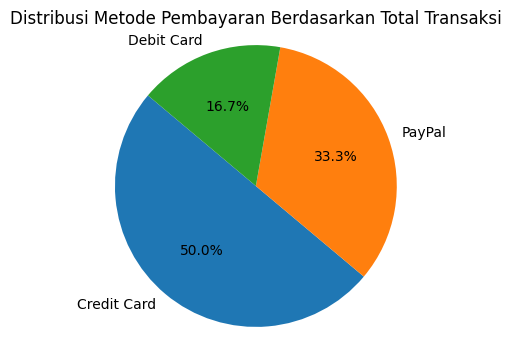

In [22]:
# Melihat metode pembayaran yang paling sering digunakan
fig = plt.figure(figsize=(4,4))

# Menghitung jumlah transaksi berdasarkan metode pembayaran
payment_method_distribution = onlinesales_df['Payment_Method'].value_counts()

plt.pie(payment_method_distribution, labels=payment_method_distribution.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Distribusi Metode Pembayaran Berdasarkan Total Transaksi')
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()

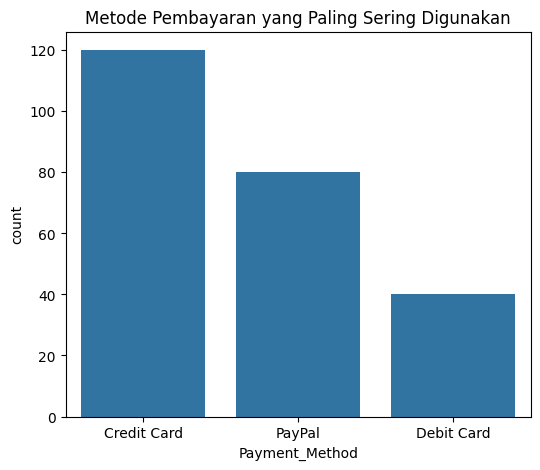

In [23]:
# Melihat metode pembayaran yang paling sering digunakan
plt.figure(figsize=(6, 5))
sns.countplot(x='Payment_Method', data=onlinesales_df)
plt.title('Metode Pembayaran yang Paling Sering Digunakan')
plt.show()

  Month  Units_Sold
0   Jan          68
1   Feb          77
2   Mar          82
3   Apr          65
4   May          60
5   Jun          61
6   Jul          53
7   Aug          52


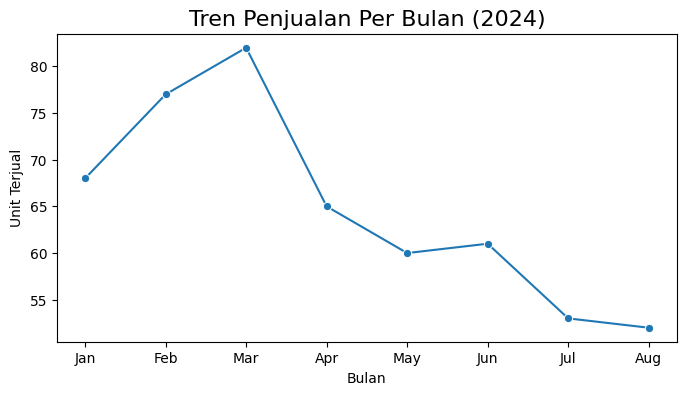

In [34]:
# Membuat kolom bulan dalam format singkatan dan mengatur urutan bulan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
onlinesales_df['Month'] = pd.Categorical(onlinesales_df['Month'], categories=month_order, ordered=True)

# Mengelompokkan data berdasarkan bulan untuk menganalisis tren penjualan
monthly_sales = onlinesales_df.groupby(['Month']).sum()['Units_Sold'].reset_index()

print(monthly_sales)

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(8, 4))
sns.lineplot(x='Month', y='Units_Sold', data=monthly_sales, marker='o')

# Menambahkan judul dan label sumbu
plt.title('Tren Penjualan Per Bulan (2024)', size=16)
plt.xlabel('Bulan')
plt.ylabel('Unit Terjual')
plt.xticks()

# Menampilkan plot
plt.show()

  Month  Total_Revenue
0   Jan       14548.32
1   Feb       10803.37
2   Mar       12849.24
3   Apr       12451.69
4   May        8455.49
5   Jun        7384.55
6   Jul        6797.08
7   Aug        7278.11


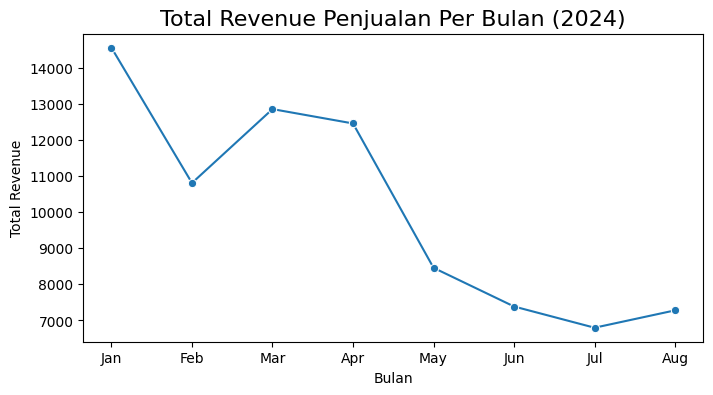

In [35]:
# Mengelompokkan data berdasarkan bulan untuk menganalisis tren penjualan
monthly_revenue = onlinesales_df.groupby(['Month']).sum()['Total_Revenue'].reset_index()

print(monthly_revenue)

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(8, 4))
sns.lineplot(x='Month', y='Total_Revenue', data=monthly_revenue, marker='o')

# Menambahkan judul dan label sumbu
plt.title('Total Revenue Penjualan Per Bulan (2024)', size=16)
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks()

# Menampilkan plot
plt.show()

   Product_Category Month  Units_Sold
0   Beauty Products   Jan           5
32  Home Appliances   Jan           6
24      Electronics   Jan          10
40           Sports   Jan          17
16         Clothing   Jan          16
8             Books   Jan          14
33  Home Appliances   Feb           8
25      Electronics   Feb          12
17         Clothing   Feb          19
41           Sports   Feb          15
1   Beauty Products   Feb           7
9             Books   Feb          16
10            Books   Mar          17
42           Sports   Mar          16
34  Home Appliances   Mar           9
2   Beauty Products   Mar           6
18         Clothing   Mar          24
26      Electronics   Mar          10
35  Home Appliances   Apr           7
43           Sports   Apr           8
27      Electronics   Apr           9
3   Beauty Products   Apr           6
11            Books   Apr          15
19         Clothing   Apr          20
20         Clothing   May          17
4   Beauty P

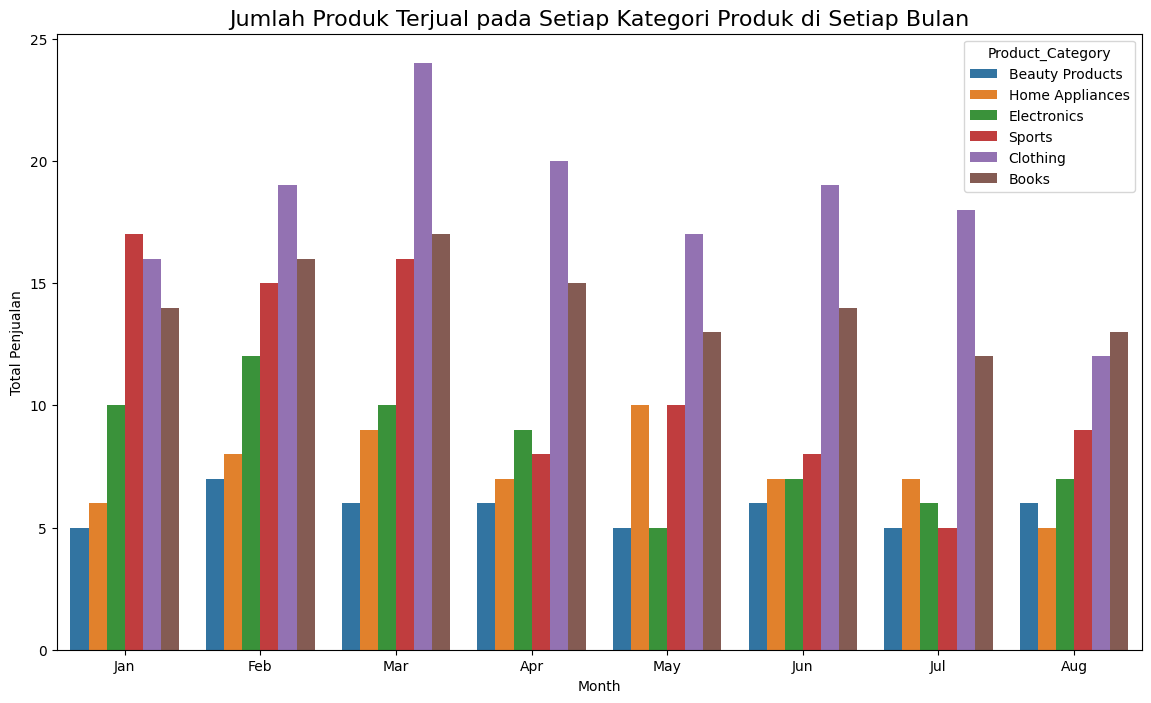

In [43]:
# Mengelompokkan data untuk mendapatkan total Units_Sold berdasarkan Product_Category dan Month
sales_by_category_month = onlinesales_df.groupby(['Product_Category', 'Month'])['Units_Sold'].sum().reset_index()

# Mengurutkan data berdasarkan Month_num agar bulan terurut dengan benar
sales_by_category_month = sales_by_category_month.sort_values('Month')

print(sales_by_category_month)

plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='Units_Sold', hue='Product_Category', data=sales_by_category_month)

plt.title('Jumlah Produk Terjual pada Setiap Kategori Produk di Setiap Bulan', size=16)
plt.xlabel('Month')
plt.ylabel('Total Penjualan')

# Menampilkan plot
plt.show()

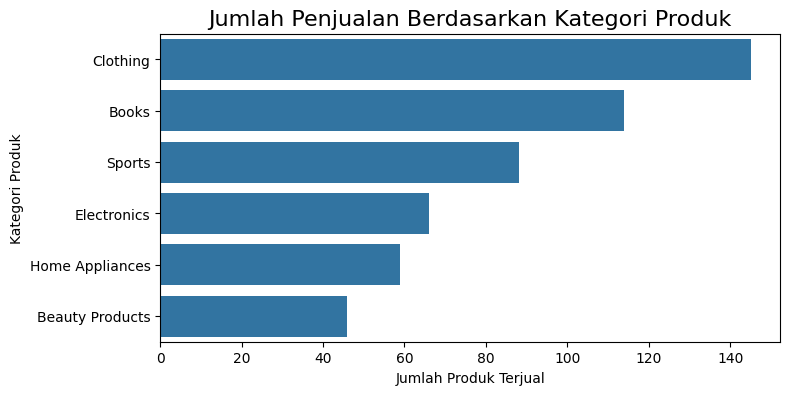

In [26]:
# Mengelompokkan data berdasarkan kategori produk untuk menganalisis tren penjualan
sales_by_product = onlinesales_df.groupby('Product_Category')['Units_Sold'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Units_Sold', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Units_Sold', y='Product_Category', data=sales_by_product)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Penjualan Berdasarkan Kategori Produk', size=16)
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Kategori Produk')

plt.show()

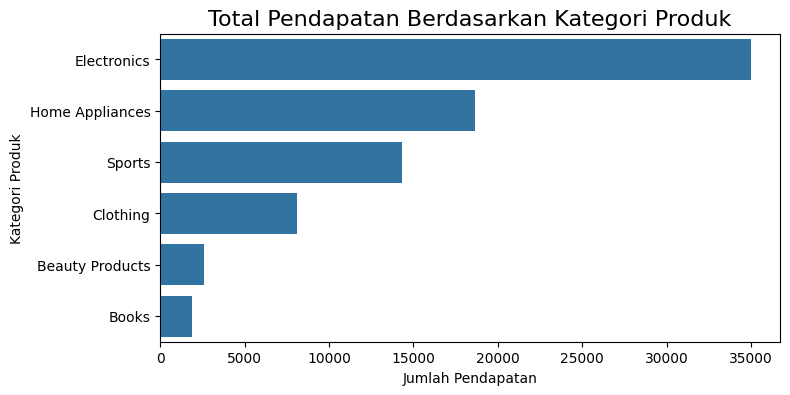

In [27]:
# Mengelompokkan data berdasarkan kategori produk untuk menganalisis tren penjualan
revenue_by_product = onlinesales_df.groupby('Product_Category')['Total_Revenue'].sum().reset_index()
revenue_by_product = revenue_by_product.sort_values(by='Total_Revenue', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Total_Revenue', y='Product_Category', data=revenue_by_product)

# Menambahkan judul dan label sumbu
plt.title('Total Pendapatan Berdasarkan Kategori Produk', size=16)
plt.xlabel('Jumlah Pendapatan')
plt.ylabel('Kategori Produk')

plt.show()

Pendapatan terbanyak dihasilkan oleh kategori produk Elektronik, kemudian disusul oleh Peralatan Rumah Tangga, dan Olahraga. Sementara produk paling sedikit pendapatannya adalah Buku, Produk Kecantikan, dan Pakaian.

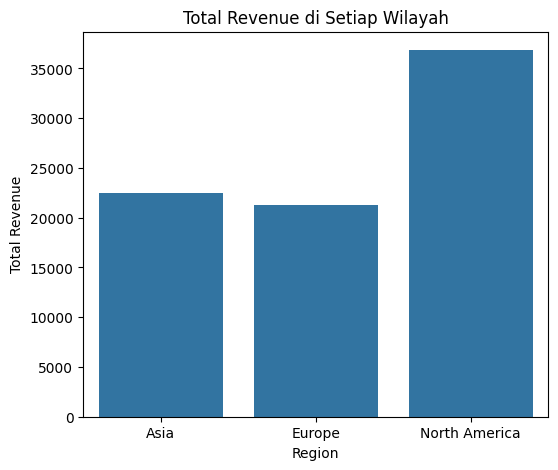

In [28]:
# Mengelompokkan data berdasarkan region untuk menganalisis total revenue
region_revenue = onlinesales_df.groupby(['Region'])['Total_Revenue'].sum().reset_index()

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(6, 5))
sns.barplot(x='Region', y='Total_Revenue', data=region_revenue)

# Menambahkan judul dan label sumbu
plt.title('Total Revenue di Setiap Wilayah', size=12)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

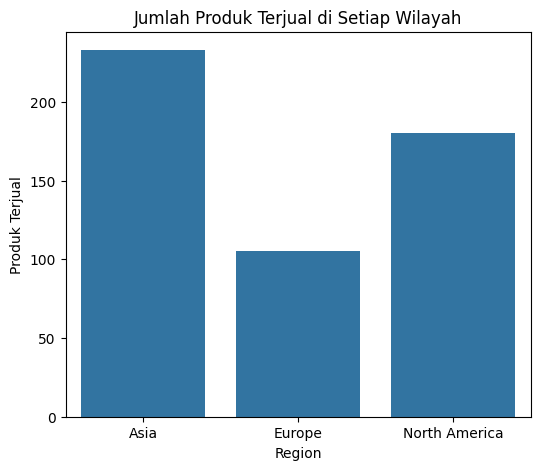

In [29]:
# Mengelompokkan data berdasarkan region untuk menganalisis tren penjualan
region_sales_sold = onlinesales_df.groupby(['Region'])['Units_Sold'].sum().reset_index()

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(6, 5))
sns.barplot(x='Region', y='Units_Sold', data=region_sales_sold)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Produk Terjual di Setiap Wilayah', size=12)
plt.xlabel('Region')
plt.ylabel('Produk Terjual')
plt.show()

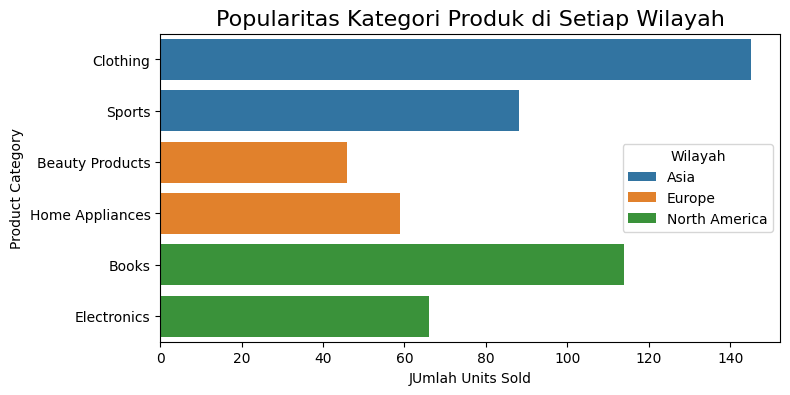

In [30]:
# Mengelompokkan data berdasarkan region untuk menganalisis tren penjualan
region_sales = onlinesales_df.groupby(['Region','Product_Category'])['Units_Sold'].sum().reset_index()

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(8, 4))
sns.barplot(x='Units_Sold', y='Product_Category', hue='Region', data=region_sales)

# Menambahkan judul dan label sumbu
plt.title('Popularitas Kategori Produk di Setiap Wilayah', size=16)
plt.xlabel('JUmlah Units Sold')
plt.ylabel('Product Category')
plt.legend(title='Wilayah')
plt.show()

  Payment_Method  Units_Sold  Total_Revenue
0    Credit Card         268       51170.86
2         PayPal         105       21268.06
1     Debit Card         145        8128.93


([0, 1, 2],
 [Text(0, 0, 'Credit Card'), Text(1, 0, 'PayPal'), Text(2, 0, 'Debit Card')])

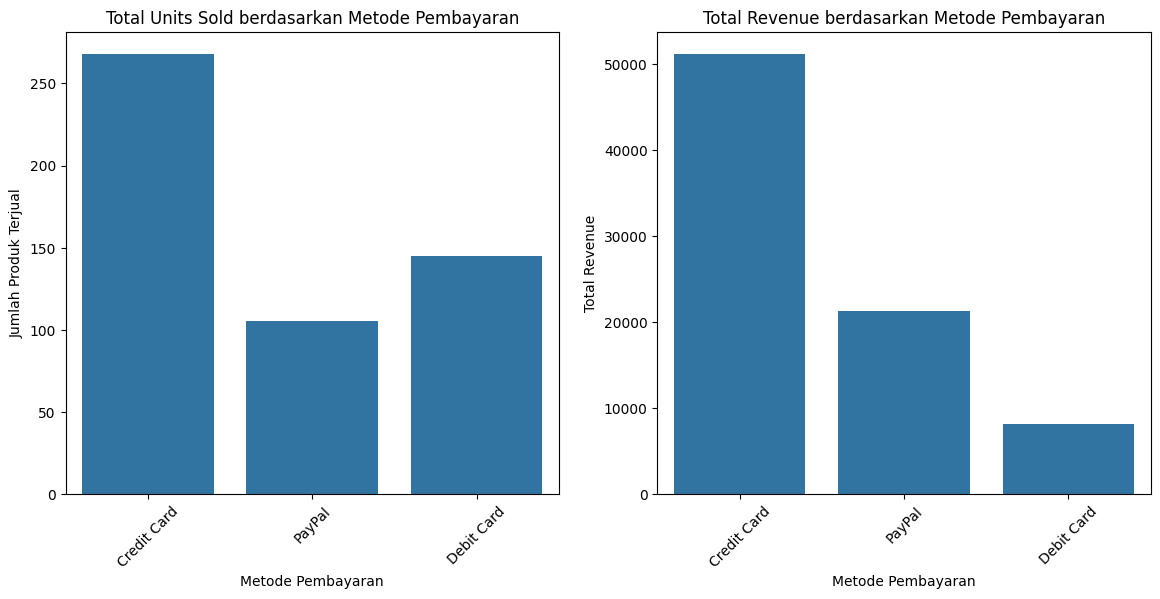

In [31]:
# Mengelompokkan data berdasarkan metode pembayaran untuk menganalisis total penjualan dan pendapatan
payment_method_sales = onlinesales_df.groupby(['Payment_Method']).agg({'Units_Sold': 'sum', 'Total_Revenue': 'sum'}).reset_index()

# Mengurutkan hasil berdasarkan total revenue
payment_method_sales = payment_method_sales.sort_values(by='Total_Revenue', ascending=False)

print(payment_method_sales)

# Visualisasi total penjualan dan pendapatan berdasarkan metode pembayaran
plt.figure(figsize=(14, 6))

# Bar plot untuk Units Sold
plt.subplot(1, 2, 1)
sns.barplot(x='Payment_Method', y='Units_Sold', data=payment_method_sales)
plt.title('Total Units Sold berdasarkan Metode Pembayaran', size=12)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(rotation=45)

# Bar plot untuk Total Revenue
plt.subplot(1, 2, 2)
sns.barplot(x='Payment_Method', y='Total_Revenue', data=payment_method_sales)
plt.title('Total Revenue berdasarkan Metode Pembayaran', size=12)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

##Insights:

**Total Penjualan	: 518 produk**

**Total Pendapatan 	: 80.57k**

**Kategori produk dengan penjualan terbanyak : Pakaian**

**Kategori produk yang menghasilkan pendapatan terbanyak : Elektronik**

**Kategori produk yang perlu mendapatkan perhatian : Peralatan rumah tangga dan produk kecantikan**

=================================================================

Penjualan setiap bulan
*   Penjualan tertinggi pada bulan Maret, sebanyak 82 produk.
*   Penjualan mengalami kenaikan dari bulan Januari-Maret.
*   Penjualan mengalami penurunan dari bulan April-Agustus.

-

Pendapatan setiap bulan
* Pendapatan tertinggi pada bulan Januari, sebesar 14.54k.
* Pendapatan mengalami naik-turun sejak bulan Januari.


-


Total produk terjual berdasarkan kategori setiap bulannya
- Berdasarkan pendapatan, bulan Januari produk banyak terjual pada kategori olahraga dan elektronik.
- Berdasarkan penjualan, bulan Maret produk banyak terjual pada kategori pakaian
Kategori produk elektronik setiap bulannya mengalami penurunan penjualan sejak bulan April.


-



Pendapatan pada setiap kategori Produk
- Elektronik, peralatan rumah tangga, dan olahraga merupakan kategori produk penyumbang pendapatan terbanyak.
- Walaupun buku terjual banyak, tetapi pendapatannya tetap paling sedikit diantara yang lain. Hal ini dikarenakan buku memiliki harga jual yang lebih murah dibanding yang lain.

-


Pendapatan pada setiap wilayah
- Wilayah menghasilkan pendapatan paling besar adalah North Amerika.

-

Produk terjual pada setiap wilayah
- Produk banyak terjual pada wilayah Asia.

-

Produk populer di setiap wilayah
- Produk yang banyak terjual di North America, penghasil pendapatan paling besar adalah elektronik dan buku.
- Pakaian merupakan penjualan paling banyak di wilayah Asia
Produk paling populer di Eropa merupakan produk kecantikan dan peralatan rumah tangga.

-

**Kesimpulan:**

Untuk Meningkatkan Penjualan dan Pendapatan
- Penyumbang pendapatan terbanyak berasal dari kategori produk elektronik, peralatan rumah tangga, dan produk olahraga.
- Pendapatan mengalami penurunan sejak bulan April dan seterusnya karena penjualan 3 kategori produk tersebut menurun. Strategi pemasaran pada ketiga kategori produk tersebut perlu difokuskan agar penjualan dan pendapatan mengalami kenaikan.
- Untuk kategori produk elektronik dapat difokuskan pada wilayah North America karena penjualan kategori produk tersebut populer disana.
- Wilayah Eropa merupakan wilayah dengan pendapatan paling kecil diantara wilayah lain. Kategori produk populer yang terjual merupakan peralatan rumah tangga. Kategori produk tersebut masuk ke dalam penyumbang pendapatan yang banyak. Strategi pemasaran penjualan produk tersebut perlu difokuskan di wilayah Eropa.
- Untuk kategori olahraga dapat difokuskan pada wilayah Asia karena kategori tersebut populer di wilayah Asia dan masuk ke dalam penyumbang pendapatan yang banyak.

-

Kategori Produk yang perlu diperhatikan
- Produk kecantikan merupakan kategori produk yang populer di Eropa, tetapi penjualannya paling sedikit, hal ini perlu diperhatikan kembali strategi pemasarannya di wilayah Eropa agar penjualannya semakin banyak. Dapat dilakukan dengan mencari tahu produk kecantikan apa yang sedang populer di masyarakat, serta dapat memberikan tawaran yang menarik agar penjualan meningkat
- Peralatan rumah tangga merupakan kategori produk terjual paling sedikit dan kategori produk tersebut populer di wilayah Eropa. Hal tersebut perlu ditingkatkan strategi pemasarannya agar penjualan meningkat.
